<a href="https://colab.research.google.com/github/tamojit-maiti/upgrad-teaching/blob/main/intro_pandas/Python_%7C_Introduction_to_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!--<img width=700px; src="../img/logoUPSayPlusCDS_990.png"> -->

<p style="margin-top: 3em; margin-bottom: 2em;"><b><big><big><big><big>Introduction to Pandas</big></big></big></big></b></p>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. The Titanic survival data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.head()

Starting from reading this dataset, to answering questions about this data in a few lines of code:

**What is the age distribution of the passengers?**

**How does the survival rate of the passengers differ between genders?**

**Or how does it differ between the different classes?**

All the needed functionality for the above examples will be explained throughout this tutorial.

We will come back to this example, and build them up step by step.

# 2. Pandas: data analysis in python

What is `pandas`?

* Pandas can be thought of as *NumPy arrays with labels* for rows and columns, and better support for heterogeneous data types, but it's also much, much more than that.
* Powerful for working with missing data, working with time series data, for reading and writing your data, for reshaping, grouping, merging your data, ...

Its documentation: http://pandas.pydata.org/pandas-docs/stable/


** When do you need pandas? **

When working with **tabular or structured data** (like R dataframe, SQL table, Excel spreadsheet, ...):

- Import data
- Clean up messy data
- Explore data, gain insight into data
- Process and prepare your data for analysis
- Analyse your data (together with scikit-learn, statsmodels, ...)

# 2. The pandas data structures: `DataFrame` and `Series`

A `DataFrame` is a **tablular data structure** (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object.

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Attributes of the DataFrame

A DataFrame has besides a `index` attribute, also a `columns` attribute:

In [ ]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

To check the data types of the different columns:

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

An overview of that information can be given with the `info()` method:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Also a DataFrame has a `values` attribute, but attention: when you have heterogeneous data, all values will be upcasted:

In [ ]:
df.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

Apart from importing your data from an external source (text file, excel, database, ..), one of the most common ways of creating a dataframe is from a dictionary of arrays or lists.

Note that in the IPython notebook, the dataframe will display in a rich HTML view:

In [ ]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
df_countries = pd.DataFrame(data)
df_countries.tail()

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


### One-dimensional data: `Series` (a column of a DataFrame)

A Series is a basic holder for **one-dimensional labeled data**.

In [ ]:
(df.Age.dropna().values.mean())

29.69911764705882

In [ ]:
age = df['Age']

### Attributes of a Series: `index` and `values`

The Series has also an `index` and `values` attribute, but no `columns`

In [ ]:
age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
age.index

RangeIndex(start=0, stop=891, step=1)

You can access the underlying numpy array representation with the `.values` attribute:

In [ ]:
age.values[:10]

array([22., 38., 26., 35., 35., nan, 54.,  2., 27., 14.])

We can access series values via the index, just like for NumPy arrays:

In [ ]:
age[2]

26.0

Unlike the NumPy array, though, this index can be something other than integers:

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df = df.set_index('Name')
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
df.loc['Braund, Mr. Owen Harris']

PassengerId            1
Survived               0
Pclass                 3
Sex                 male
Age                   22
SibSp                  1
Parch                  0
Ticket         A/5 21171
Fare                7.25
Cabin                NaN
Embarked               S
Name: Braund, Mr. Owen Harris, dtype: object

In [ ]:
df.iloc[0]

PassengerId            1
Survived               0
Pclass                 3
Sex                 male
Age                   22
SibSp                  1
Parch                  0
Ticket         A/5 21171
Fare                7.25
Cabin                NaN
Embarked               S
Name: Braund, Mr. Owen Harris, dtype: object

In [ ]:
age = df['Age']
age

Name
Braund, Mr. Owen Harris                                22.0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    38.0
Heikkinen, Miss. Laina                                 26.0
Futrelle, Mrs. Jacques Heath (Lily May Peel)           35.0
Allen, Mr. William Henry                               35.0
                                                       ... 
Montvila, Rev. Juozas                                  27.0
Graham, Miss. Margaret Edith                           19.0
Johnston, Miss. Catherine Helen "Carrie"                NaN
Behr, Mr. Karl Howell                                  26.0
Dooley, Mr. Patrick                                    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
age['Dooley, Mr. Patrick']

32.0

but with the power of numpy arrays. Many things you can do with numpy arrays, can also be applied on DataFrames / Series.

Eg element-wise operations:

In [ ]:
age 

Name
Braund, Mr. Owen Harris                                22.0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    38.0
Heikkinen, Miss. Laina                                 26.0
Futrelle, Mrs. Jacques Heath (Lily May Peel)           35.0
Allen, Mr. William Henry                               35.0
                                                       ... 
Montvila, Rev. Juozas                                  27.0
Graham, Miss. Margaret Edith                           19.0
Johnston, Miss. Catherine Helen "Carrie"                NaN
Behr, Mr. Karl Howell                                  26.0
Dooley, Mr. Patrick                                    32.0
Name: Age, Length: 891, dtype: float64



A range of methods such as mean, median, maximun, minimum etc


In [ ]:
age.mean(), age.min()

(29.69911764705882, 0.42)

Fancy indexing, like indexing with a list or boolean indexing:

In [ ]:
(age > 70).mean()

0.005611672278338945

In [ ]:
len(age[age > 70])

5

But also a lot of pandas specific methods, e.g.

In [ ]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df['Embarked'].nunique()

3

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What is the maximum Fare that was paid? And the median? And Minimum and the Mean?</li>
</ul>
</div>

In [ ]:
df.Fare.max(), df['Fare'].max()

(512.3292, 512.3292)

In [ ]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the average survival ratio for all passengers (note: the 'Survived' column indicates whether someone survived (1) or not (0)).</li>
</ul>
</div>

In [1]:
df.Survived.mean()

NameError: ignored

# 3. Data import and export

A wide range of input/output formats are natively supported by pandas:

* CSV, text
* SQL database
* Excel
* ...

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 4. Exploration

Some useful methods:

`head` and `tail`

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


`info()`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Getting some basic summary statistics about the data with `describe`:

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Quickly visualizing the data

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


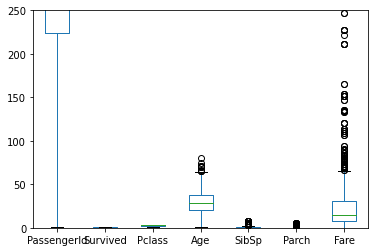

In [ ]:
df.plot(kind='box', ylim=[0,250])

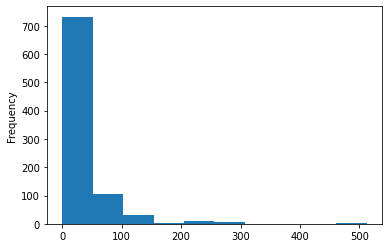

In [ ]:
df['Fare'].plot(kind='hist', bins=10)

<div class="alert alert-success">

<b>EXERCISE</b>: 

 <ul>
  <li>Plot the age distribution of the titanic passengers</li>
</ul>
</div>

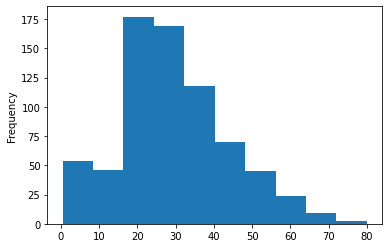

In [ ]:
df['Age'].plot(kind = 'hist')

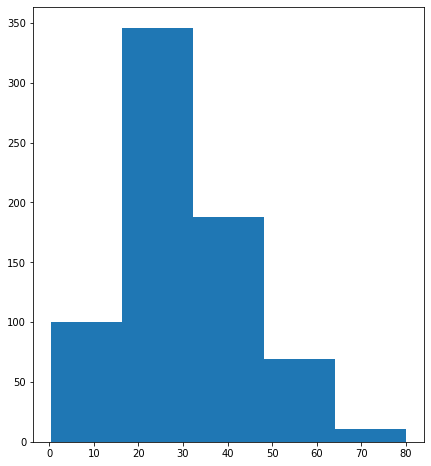

In [ ]:
plt.figure(figsize = (7,8))
plt.hist(df.Age, bins = 5)
plt.show()

The default plot (when not specifying `kind`) is a line plot of all (numeric) columns, with the x-axis specified by the index

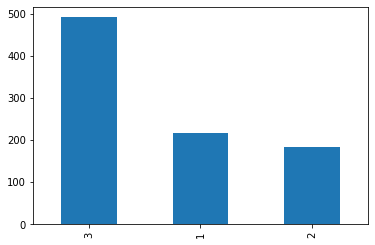

In [ ]:
df.Pclass.value_counts().plot(kind = 'bar')
plt.show()

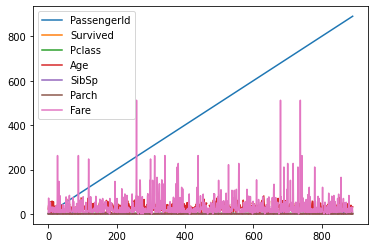

In [ ]:
df.plot()

This does not say too much ..

We can select part of the data (eg one column)


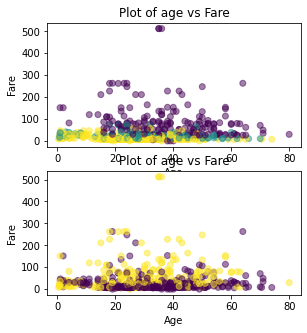

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(221)
plt.scatter(df['Age'], df['Fare'], alpha = 0.5, c = df['Pclass'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Plot of age vs Fare')

plt.subplot(223)
plt.scatter(df['Age'], df['Fare'], alpha = 0.5, c = df['Survived'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Plot of age vs Fare')

plt.show()

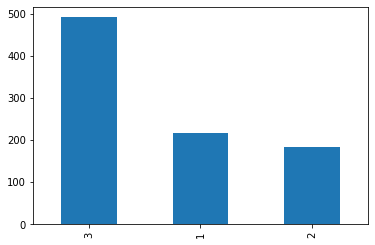

In [ ]:
df['Pclass'].value_counts().plot(kind = 'bar')

# 5. Selecting and filtering data

<div class="alert alert-warning">
<b>ATTENTION!</b>: <br><br>

One of pandas' basic features is the labeling of rows and columns, but this makes indexing also a bit more complex compared to numpy. <br><br> We now have to distuinguish between:

 <ul>
  <li>selection by **label**</li>
  <li>selection by **position**</li>
</ul>
</div>

### `df[]` provides some convenience shortcuts 

For a DataFrame, basic indexing selects the columns.

Selecting a single column:

In [ ]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

or multiple columns:

In [ ]:
df[['Age', 'Fare']]

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


But, slicing accesses the rows:

In [ ]:
df.iloc[10:15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


### Systematic indexing with `loc` and `iloc`

When using `[]` like above, you can only select from one axis at once (rows or columns, not both). For more advanced indexing, you have some extra attributes:
    
* `loc`: selection by label
* `iloc`: selection by position

In [ ]:
df = df.reset_index()
df = df.set_index('Name')

In [ ]:
df

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,,
"Braund, Mr. Owen Harris",0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
"Graham, Miss. Margaret Edith",887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
df.loc['Bonnell, Miss. Elizabeth']

index              11
PassengerId        12
Survived            1
Pclass              1
Sex            female
Age                58
SibSp               0
Parch               0
Ticket         113783
Fare            26.55
Cabin            C103
Embarked            S
Name: Bonnell, Miss. Elizabeth, dtype: object

In [ ]:
df.loc['Bonnell, Miss. Elizabeth', 'Fare']

26.55

In [ ]:
df.loc['Bonnell, Miss. Elizabeth':'Andersson, Mr. Anders Johan', :]

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,,
"Bonnell, Miss. Elizabeth",11,12,1,1,female,58.0,0,0,113783,26.550,C103,S
"Saundercock, Mr. William Henry",12,13,0,3,male,20.0,0,0,A/5. 2151,8.050,NaN,S
"Andersson, Mr. Anders Johan",13,14,0,3,male,39.0,1,5,347082,31.275,NaN,S


Selecting by position with `iloc` works similar as indexing numpy arrays:

In [ ]:
df.iloc[0:2,1:3]

,PassengerId,Survived
Name,,
"Braund, Mr. Owen Harris",1,0
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1


The different indexing methods can also be used to assign data:

In [ ]:
df.loc['Braund, Mr. Owen Harris', 'Survived']

0

In [ ]:
df.loc['Braund, Mr. Owen Harris', 'Survived'] = 100

In [ ]:
df

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,,
"Braund, Mr. Owen Harris",0,1,100,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
"Graham, Miss. Margaret Edith",887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### Boolean indexing (filtering)

Often, you want to select rows based on a certain condition. This can be done with 'boolean indexing' (like a where clause in SQL) and comparable to numpy. 

The indexer (or boolean mask) should be 1-dimensional and the same length as the thing being indexed.

In [ ]:
df['Fare'] > 50

Name
Braund, Mr. Owen Harris                                False
Cumings, Mrs. John Bradley (Florence Briggs Thayer)     True
Heikkinen, Miss. Laina                                 False
Futrelle, Mrs. Jacques Heath (Lily May Peel)            True
Allen, Mr. William Henry                               False
                                                       ...  
Montvila, Rev. Juozas                                  False
Graham, Miss. Margaret Edith                           False
Johnston, Miss. Catherine Helen "Carrie"               False
Behr, Mr. Karl Howell                                  False
Dooley, Mr. Patrick                                    False
Name: Fare, Length: 891, dtype: bool

In [ ]:
df[df['Fare'] > 50]

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,,
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"McCarthy, Mr. Timothy J",6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S
"Fortune, Mr. Charles Alexander",27,28,0,1,male,19.0,3,2,19950,263.0000,C23 C25 C27,S
"Spencer, Mrs. William Augustus (Marie Eugenie)",31,32,1,1,female,NaN,1,0,PC 17569,146.5208,B78,C
...,...,...,...,...,...,...,...,...,...,...,...,...
"Wick, Mrs. George Dennick (Mary Hitchcock)",856,857,1,1,female,45.0,1,1,36928,164.8667,NaN,S
"Sage, Miss. Dorothy Edith ""Dolly""",863,864,0,3,female,NaN,8,2,CA. 2343,69.5500,NaN,S
"Roebling, Mr. Washington Augustus II",867,868,0,1,male,31.0,0,0,PC 17590,50.4958,A24,S


Also very often, you want to select rows based on more than one condition, in which case you can combine conditions using or/and

In [ ]:
df[(df.Sex == 'male') & (df.Embarked == 'Q')]

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,,
"Moran, Mr. James",5,6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q
"Rice, Master. Eugene",16,17,0,3,male,2.0,4,1,382652,29.1250,NaN,Q
"Lennon, Mr. Denis",46,47,0,3,male,NaN,1,0,370371,15.5000,NaN,Q
"Connors, Mr. Patrick",116,117,0,3,male,70.5,0,0,370369,7.7500,NaN,Q
"McMahon, Mr. Martin",126,127,0,3,male,NaN,0,0,370372,7.7500,NaN,Q
"Burke, Mr. Jeremiah",143,144,0,3,male,19.0,0,0,365222,6.7500,NaN,Q
"Rice, Master. Arthur",171,172,0,3,male,4.0,4,1,382652,29.1250,NaN,Q
"Bourke, Mr. John",188,189,0,3,male,40.0,1,1,364849,15.5000,NaN,Q
"Mernagh, Mr. Robert",196,197,0,3,male,NaN,0,0,368703,7.7500,NaN,Q


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Based on the titanic data set, select all rows for male passengers and calculate the mean age of those passengers. Do the same for the female passengers</li>
</ul>
</div>

In [ ]:
df[df['Sex'] == 'male'].Age.mean()

30.72664459161148

In [ ]:
df[df['Sex'] == 'female'].Age.mean()

27.915708812260537

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Based on the titanic data set, how many passengers older than 70 were on the Titanic?</li>
<li>Based on the titanic data set, how many passengers older than 70 and Male were on the Titanic?</li>
<li>Based on the titanic data set, are there more Male First Class passengers than Female? What about the Third Class?</li>

</ul>
</div>

In [ ]:
len(df[df['Age'] > 70]), (df['Age'] > 50).mean()

(5, 0.0718294051627385)

In [ ]:
((df['Age'] > 70) & (df['Sex'] == 'male')).sum()

5

In [ ]:
len(df[(df['Pclass'] == 1) & (df['Sex'] == 'male')]), len(df[(df['Pclass'] == 1) & (df['Sex'] == 'female')])

(122, 94)

In [ ]:
len(df[(df['Pclass'] == 3) & (df['Sex'] == 'male')]), len(df[(df['Pclass'] == 3) & (df['Sex'] == 'female')])

(347, 144)

# 6a. Simple Column Operations

Suppose you want to operate on numeric columns
*   Add/Subtract/Multiply/Divide by a constant 
*   Add/Subtract/Multiply/Divide by another numeric column



In [ ]:
43.124 + 10

53.124

In [ ]:
df['age_plus_ten'] = df['Age'] + 10
df

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_plus_ten
Name,,,,,,,,,,,,,
"Braund, Mr. Owen Harris",0,1,100,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,32.0
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,48.0
"Heikkinen, Miss. Laina",2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,36.0
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,45.0
"Allen, Mr. William Henry",4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,37.0
"Graham, Miss. Margaret Edith",887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,29.0
"Johnston, Miss. Catherine Helen ""Carrie""",888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN


In [ ]:
df['feature_1'] = df['Age'] + df['Pclass']
df

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_plus_ten,feature_1
Name,,,,,,,,,,,,,,
"Braund, Mr. Owen Harris",0,1,100,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,32.0,25.0
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,48.0,39.0
"Heikkinen, Miss. Laina",2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,36.0,29.0
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,45.0,36.0
"Allen, Mr. William Henry",4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,45.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,37.0,29.0
"Graham, Miss. Margaret Edith",887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,29.0,20.0
"Johnston, Miss. Catherine Helen ""Carrie""",888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN


Operating on columns with string values

In [ ]:
df['name_plus_x'] = df.index + ' x'
df

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_plus_ten,feature_1,name_plus_x
Name,,,,,,,,,,,,,,,
"Braund, Mr. Owen Harris",0,1,100,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,32.0,25.0,"Braund, Mr. Owen Harris x"
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,48.0,39.0,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
"Heikkinen, Miss. Laina",2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,36.0,29.0,"Heikkinen, Miss. Laina x"
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,45.0,36.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel) x"
"Allen, Mr. William Henry",4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,45.0,38.0,"Allen, Mr. William Henry x"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,37.0,29.0,"Montvila, Rev. Juozas x"
"Graham, Miss. Margaret Edith",887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,29.0,20.0,"Graham, Miss. Margaret Edith x"
"Johnston, Miss. Catherine Helen ""Carrie""",888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN,"Johnston, Miss. Catherine Helen ""Carrie"" x"


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
 <li>Create a column named Family_size and add Parch and SibSp - 1  </li>


</ul>
</div>

In [ ]:
df['Family_size'] = df['Parch'] + df['SibSp'] 
df

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_plus_ten,feature_1,name_plus_x,Family_size
Name,,,,,,,,,,,,,,,,
"Braund, Mr. Owen Harris",0,1,100,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,32.0,25.0,"Braund, Mr. Owen Harris x",1
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,48.0,39.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
"Heikkinen, Miss. Laina",2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,36.0,29.0,"Heikkinen, Miss. Laina x",0
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,45.0,36.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel) x",1
"Allen, Mr. William Henry",4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,45.0,38.0,"Allen, Mr. William Henry x",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,37.0,29.0,"Montvila, Rev. Juozas x",0
"Graham, Miss. Margaret Edith",887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,29.0,20.0,"Graham, Miss. Margaret Edith x",0
"Johnston, Miss. Catherine Helen ""Carrie""",888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN,"Johnston, Miss. Catherine Helen ""Carrie"" x",3


# 6b. Complex Column Operations

In [ ]:
string_name = 'Kumar, Mr Naresh'
string_name.split(',')[0]

'Kumar'

In [ ]:
df['last_name'] = df.index.map(lambda x: x.split(',')[0])
df

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_plus_ten,feature_1,name_plus_x,Family_size,last_name
Name,,,,,,,,,,,,,,,,,
"Braund, Mr. Owen Harris",0,1,100,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,32.0,25.0,"Braund, Mr. Owen Harris x",1,Braund
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,48.0,39.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,Cumings
"Heikkinen, Miss. Laina",2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,36.0,29.0,"Heikkinen, Miss. Laina x",0,Heikkinen
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,45.0,36.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel) x",1,Futrelle
"Allen, Mr. William Henry",4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,45.0,38.0,"Allen, Mr. William Henry x",0,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,37.0,29.0,"Montvila, Rev. Juozas x",0,Montvila
"Graham, Miss. Margaret Edith",887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,29.0,20.0,"Graham, Miss. Margaret Edith x",0,Graham
"Johnston, Miss. Catherine Helen ""Carrie""",888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN,"Johnston, Miss. Catherine Helen ""Carrie"" x",3,Johnston


In [ ]:
pclass_map = {1:'First', 2: 'Second',3:'Third'}
df['pclass_desc'] = df['Pclass'].map(pclass_map)
df

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_plus_ten,feature_1,name_plus_x,Family_size,last_name,pclass_desc
Name,,,,,,,,,,,,,,,,,,
"Braund, Mr. Owen Harris",0,1,100,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,32.0,25.0,"Braund, Mr. Owen Harris x",1,Braund,Third
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,48.0,39.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,Cumings,First
"Heikkinen, Miss. Laina",2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,36.0,29.0,"Heikkinen, Miss. Laina x",0,Heikkinen,Third
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,45.0,36.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel) x",1,Futrelle,First
"Allen, Mr. William Henry",4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,45.0,38.0,"Allen, Mr. William Henry x",0,Allen,Third
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,37.0,29.0,"Montvila, Rev. Juozas x",0,Montvila,Second
"Graham, Miss. Margaret Edith",887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,29.0,20.0,"Graham, Miss. Margaret Edith x",0,Graham,First
"Johnston, Miss. Catherine Helen ""Carrie""",888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN,"Johnston, Miss. Catherine Helen ""Carrie"" x",3,Johnston,Third


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
 <li>Create a column named Length_of_name and store the length of the person's name in here. </li>
  <li>Create a column named Title, and extract the title of the passengers and store it in here.</li>
<li>What percentage of men have their titles as 'Mr' and what percent of women have their titles as 'Mrs'?</li>

</ul>
</div>

In [ ]:
df['length_of_name'] = df.index.map(lambda x: len(x))
df

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_plus_ten,feature_1,name_plus_x,Family_size,last_name,pclass_desc,length_of_name
Name,,,,,,,,,,,,,,,,,,,
"Braund, Mr. Owen Harris",0,1,100,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,32.0,25.0,"Braund, Mr. Owen Harris x",1,Braund,Third,23
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,48.0,39.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,Cumings,First,51
"Heikkinen, Miss. Laina",2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,36.0,29.0,"Heikkinen, Miss. Laina x",0,Heikkinen,Third,22
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,45.0,36.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel) x",1,Futrelle,First,44
"Allen, Mr. William Henry",4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,45.0,38.0,"Allen, Mr. William Henry x",0,Allen,Third,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,37.0,29.0,"Montvila, Rev. Juozas x",0,Montvila,Second,21
"Graham, Miss. Margaret Edith",887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,29.0,20.0,"Graham, Miss. Margaret Edith x",0,Graham,First,28
"Johnston, Miss. Catherine Helen ""Carrie""",888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN,"Johnston, Miss. Catherine Helen ""Carrie"" x",3,Johnston,Third,40


In [ ]:
df['title'] = df.index.map(lambda x: x.split(',')[1].split(' ')[1])
df

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_plus_ten,feature_1,name_plus_x,Family_size,last_name,pclass_desc,length_of_name,title
Name,,,,,,,,,,,,,,,,,,,,
"Braund, Mr. Owen Harris",0,1,100,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,32.0,25.0,"Braund, Mr. Owen Harris x",1,Braund,Third,23,Mr.
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,48.0,39.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,Cumings,First,51,Mrs.
"Heikkinen, Miss. Laina",2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,36.0,29.0,"Heikkinen, Miss. Laina x",0,Heikkinen,Third,22,Miss.
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,45.0,36.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel) x",1,Futrelle,First,44,Mrs.
"Allen, Mr. William Henry",4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,45.0,38.0,"Allen, Mr. William Henry x",0,Allen,Third,24,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,37.0,29.0,"Montvila, Rev. Juozas x",0,Montvila,Second,21,Rev.
"Graham, Miss. Margaret Edith",887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,29.0,20.0,"Graham, Miss. Margaret Edith x",0,Graham,First,28,Miss.
"Johnston, Miss. Catherine Helen ""Carrie""",888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN,"Johnston, Miss. Catherine Helen ""Carrie"" x",3,Johnston,Third,40,Miss.


# 7. The group-by operation

### Creating a DataFrame

In [ ]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


### Recap: aggregating functions

When analyzing data, you often calculate summary statistics (aggregations like the mean, max, ...). As we have seen before, we can easily calculate such a statistic for a Series or column using one of the many available methods. For example:

In [ ]:
df['data'].sum()

90

However, in many cases your data has certain groups in it, and in that case, you may want to calculate this statistic for each of the groups.

For example, in the above dataframe `df`, there is a column 'key' which has three possible values: 'A', 'B' and 'C'. When we want to calculate the sum for each of those groups, we could do the following:

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
 <li>Find average of `data` for each `key`</li>


</ul>
</div>

In [ ]:
for key in ['A','B','C']:    
    print(key, df[df['key'] == key].data.mean())

A 5.0
B 10.0
C 15.0


This becomes very verbose when having multiple groups. You could make the above a bit easier by looping over the different values, but still, it is not very convenient to work with.

What we did above, applying a function on different groups, is a "groupby operation", and pandas provides some convenient functionality for this.

### Groupby: applying functions per group

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

In [ ]:
df.groupby('key').min()

,data
key,
A,0
B,5
C,10


In [ ]:
df.groupby('key').agg(np.sum)  # 'sum'

,data
key,
A,15
B,30
C,45


And many more methods are available. 

In [ ]:
df.groupby('key')['data'].sum()

key
A    15
B    30
C    45
Name: data, dtype: int64

### Application of the groupby concept on the titanic data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the average age for each sex, but now using groupby.</li>
</ul>
</div>

In [ ]:
df.groupby('Sex').Age.mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the average survival ratio by gender.</li>
</ul>
</div>

In [ ]:
df.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate this survival ratio for all passengers younger that 25 (remember: filtering/boolean indexing).</li>
</ul>
</div>

In [ ]:
df[df.Age < 25].Survived.mean()

0.4244604316546763

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Or how does it differ between the different classes? Make a bar plot visualizing the survival ratio for the 3 classes.</li>
</ul>
</div>

In [ ]:
df.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Make a bar plot to visualize the average Fare payed by people depending on their age. The age column is devided is separate classes using the `pd.cut` function as provided below.</li>
</ul>
</div>

In [ ]:
df['AgeClass'] = pd.cut(df['Age'], bins=np.arange(0,90,10))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20.0, 30.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30.0, 40.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20.0, 30.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30.0, 40.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30.0, 40.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(20.0, 30.0]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(10.0, 20.0]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(20.0, 30.0]"


In [ ]:
df.groupby('AgeClass').Fare.mean()

AgeClass
(0, 10]     30.434439
(10, 20]    29.529531
(20, 30]    28.306719
(30, 40]    42.496100
(40, 50]    41.163181
(50, 60]    44.774802
(60, 70]    45.910782
(70, 80]    25.936680
Name: Fare, dtype: float64

# Further Reading

* Pandas documentation: http://pandas.pydata.org/pandas-docs/stable/

* Books

    * "Python for Data Analysis" by Wes McKinney
    * "Python Data Science Handbook" by Jake VanderPlas

* Tutorials (many good online tutorials!)

  * https://github.com/jorisvandenbossche/pandas-tutorial
  * https://github.com/brandon-rhodes/pycon-pandas-tutorial

* Tom Augspurger's blog

  * https://tomaugspurger.github.io/modern-1.html